# Model Buildings And Evaluation

## Importing Libraries

In [39]:
import os
import re
import nltk
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

## Loading Dataset

In [3]:
csv_path = os.path.join(os.path.dirname(os.getcwd()),'Datasets', 'cleaned_spam_data.csv')
spam_dataset = pd.read_csv(csv_path)

spam_dataset

,message,label
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think go usf life around though,ham
...,...,...
5164,nd time tried contact u u pound prize claim ea...,spam
5165,b going esplanade fr home,ham
5166,pity mood suggestion,ham
5167,guy bitching acted like interested buying some...,ham


### Checking For Null Values

In [4]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 7

 Column Name :label
 Total no of null values : 0


In [5]:
spam_dataset.dropna(inplace=True)
spam_dataset.reset_index(drop=True, inplace=True)

In [6]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 0

 Column Name :label
 Total no of null values : 0


## Preforming Train Test Split

In [7]:
x = spam_dataset.loc[:,'message']

x.shape

(5162,)

In [8]:
le = LabelEncoder()
y = le.fit_transform(spam_dataset.loc[:,'label'])

y.shape

(5162,)

### Tokenizeing The Data

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=20, padding='post')

x

array([[   5, 3301,  268, ...,    0,    0,    0],
       [   8,  215, 1157, ...,    0,    0,    0],
       [ 405,  828,  764, ...,  236,   30,  332],
       ...,
       [7121, 1480, 3298, ...,    0,    0,    0],
       [ 128, 7122, 3268, ...,    0,    0,    0],
       [2040,  370,  165, ...,    0,    0,    0]])

In [10]:
len(x)


5162

### Silting The Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

## Model Building

In [12]:
length_pad = 20
no_of_words = 7982

### Creating Default Model

In [13]:
def_model = Sequential()
def_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
def_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
def_model.add(Dense(64, activation='relu'))
def_model.add(Dense(1, activation='sigmoid'))

def_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
def_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def_history = def_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9001 - loss: 0.3191 - val_accuracy: 0.9748 - val_loss: 0.1042
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.9877 - loss: 0.0519 - val_accuracy: 0.9768 - val_loss: 0.1018
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9959 - loss: 0.0197 - val_accuracy: 0.9787 - val_loss: 0.0872
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9970 - loss: 0.0175 - val_accuracy: 0.9787 - val_loss: 0.0810
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.9961 - loss: 0.0144 - val_accuracy: 0.9768 - val_loss: 0.0948
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9700 - val_loss: 0.1699
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9826 - val_loss: 0.1087
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9986 - loss: 0.0112 - val_accuracy: 0.

### Creating Model With Early Stopping

In [20]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [21]:
es_model = Sequential()
es_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
es_model.add(Dense(64, activation='relu'))
es_model.add(Dense(1, activation='sigmoid'))

es_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es_history = es_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

### Creating Model With Drop Out Layer

In [19]:
dol_model = Sequential()
dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
dol_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(64, activation='relu'))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(1, activation='sigmoid'))

dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dol_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dol_history = dol_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

### Creating Model With Drop Out Layer & Early Stopping

In [22]:
es_dol_model = Sequential()
es_dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_dol_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(64, activation='relu'))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(1, activation='sigmoid'))

es_dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_dol_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es_dol_history = es_dol_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

## Model Evaluation

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluating  Default Model :-
Model Accuracy   :  0.97
Model precision  :  0.92
Model recall     :  0.86
Model f1_score   :  0.89
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.92      0.86      0.89       125

    accuracy                           0.97      1033
   macro avg       0.95      0.93      0.94      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[899   9]
 [ 17 108]]


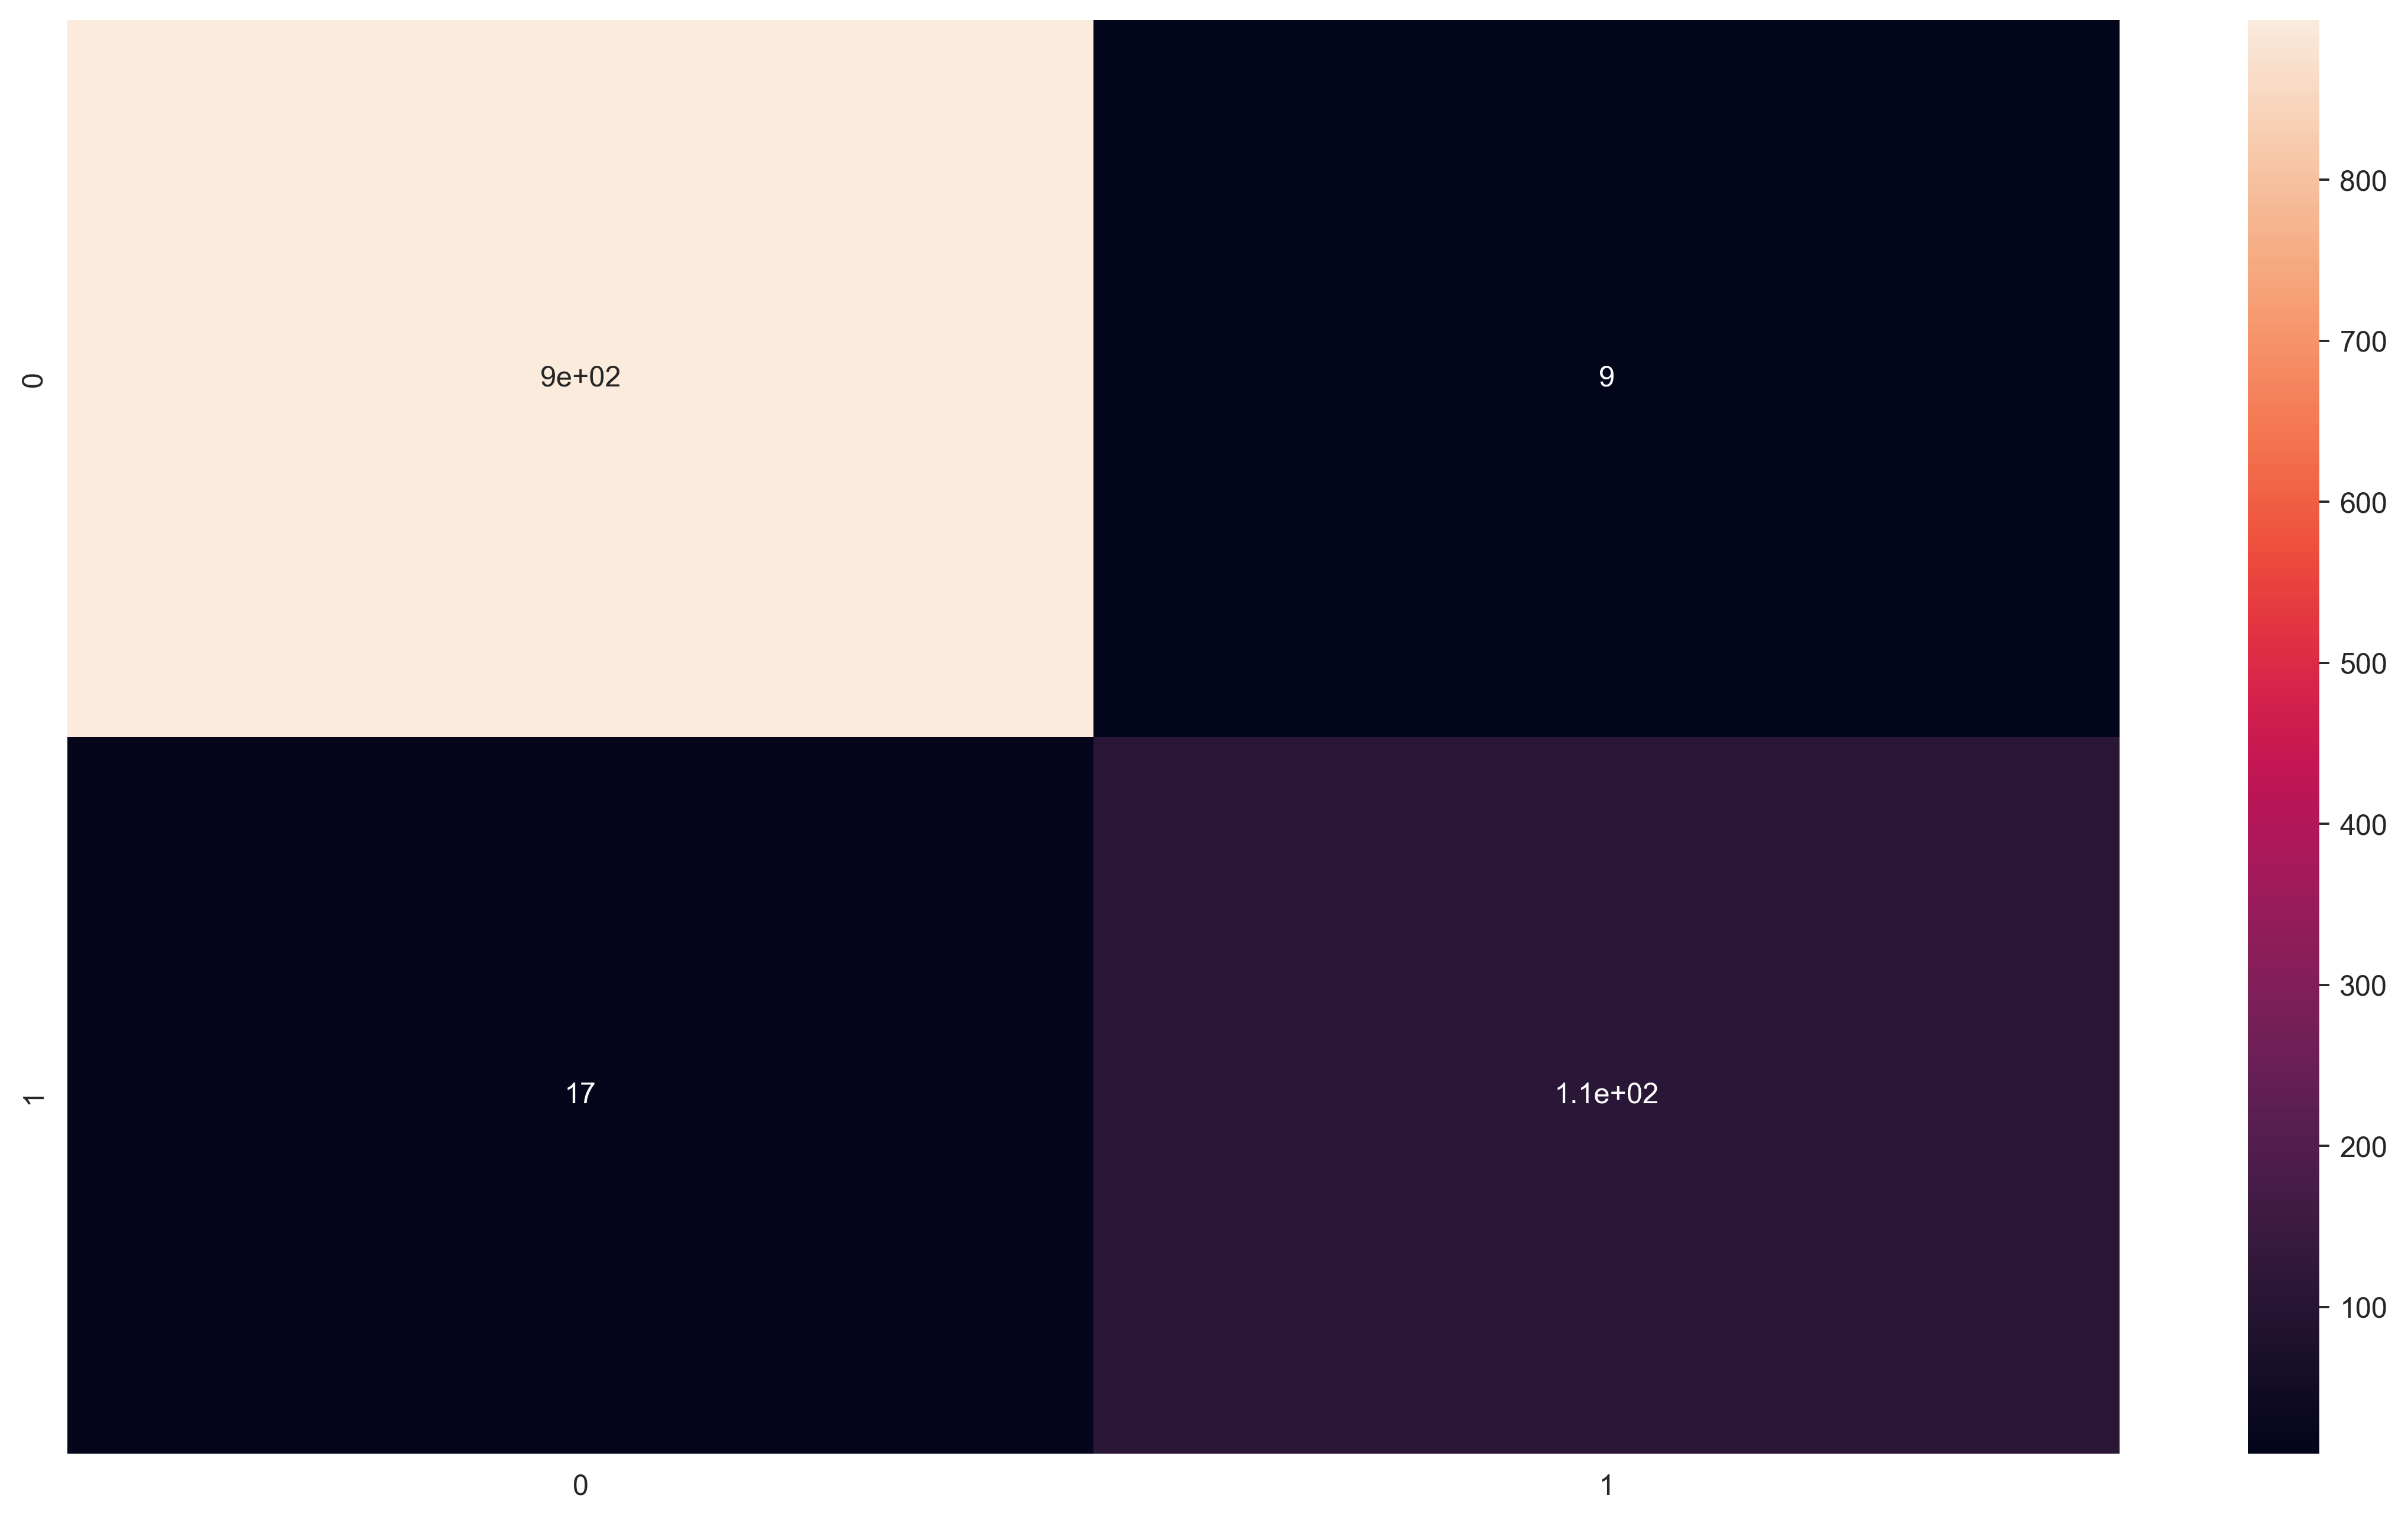

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluating  ES Model :-
Model Accuracy   :  0.13
Model precision  :  0.09
Model recall     :  0.7
Model f1_score   :  0.16
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.53      0.05      0.09       908
           1       0.09      0.70      0.16       125

    accuracy                           0.13      1033
   macro avg       0.31      0.37      0.12      1033
weighted avg       0.48      0.13      0.10      1033
 

Printing Confusion Matrix :
[[ 43 865]
 [ 38  87]]


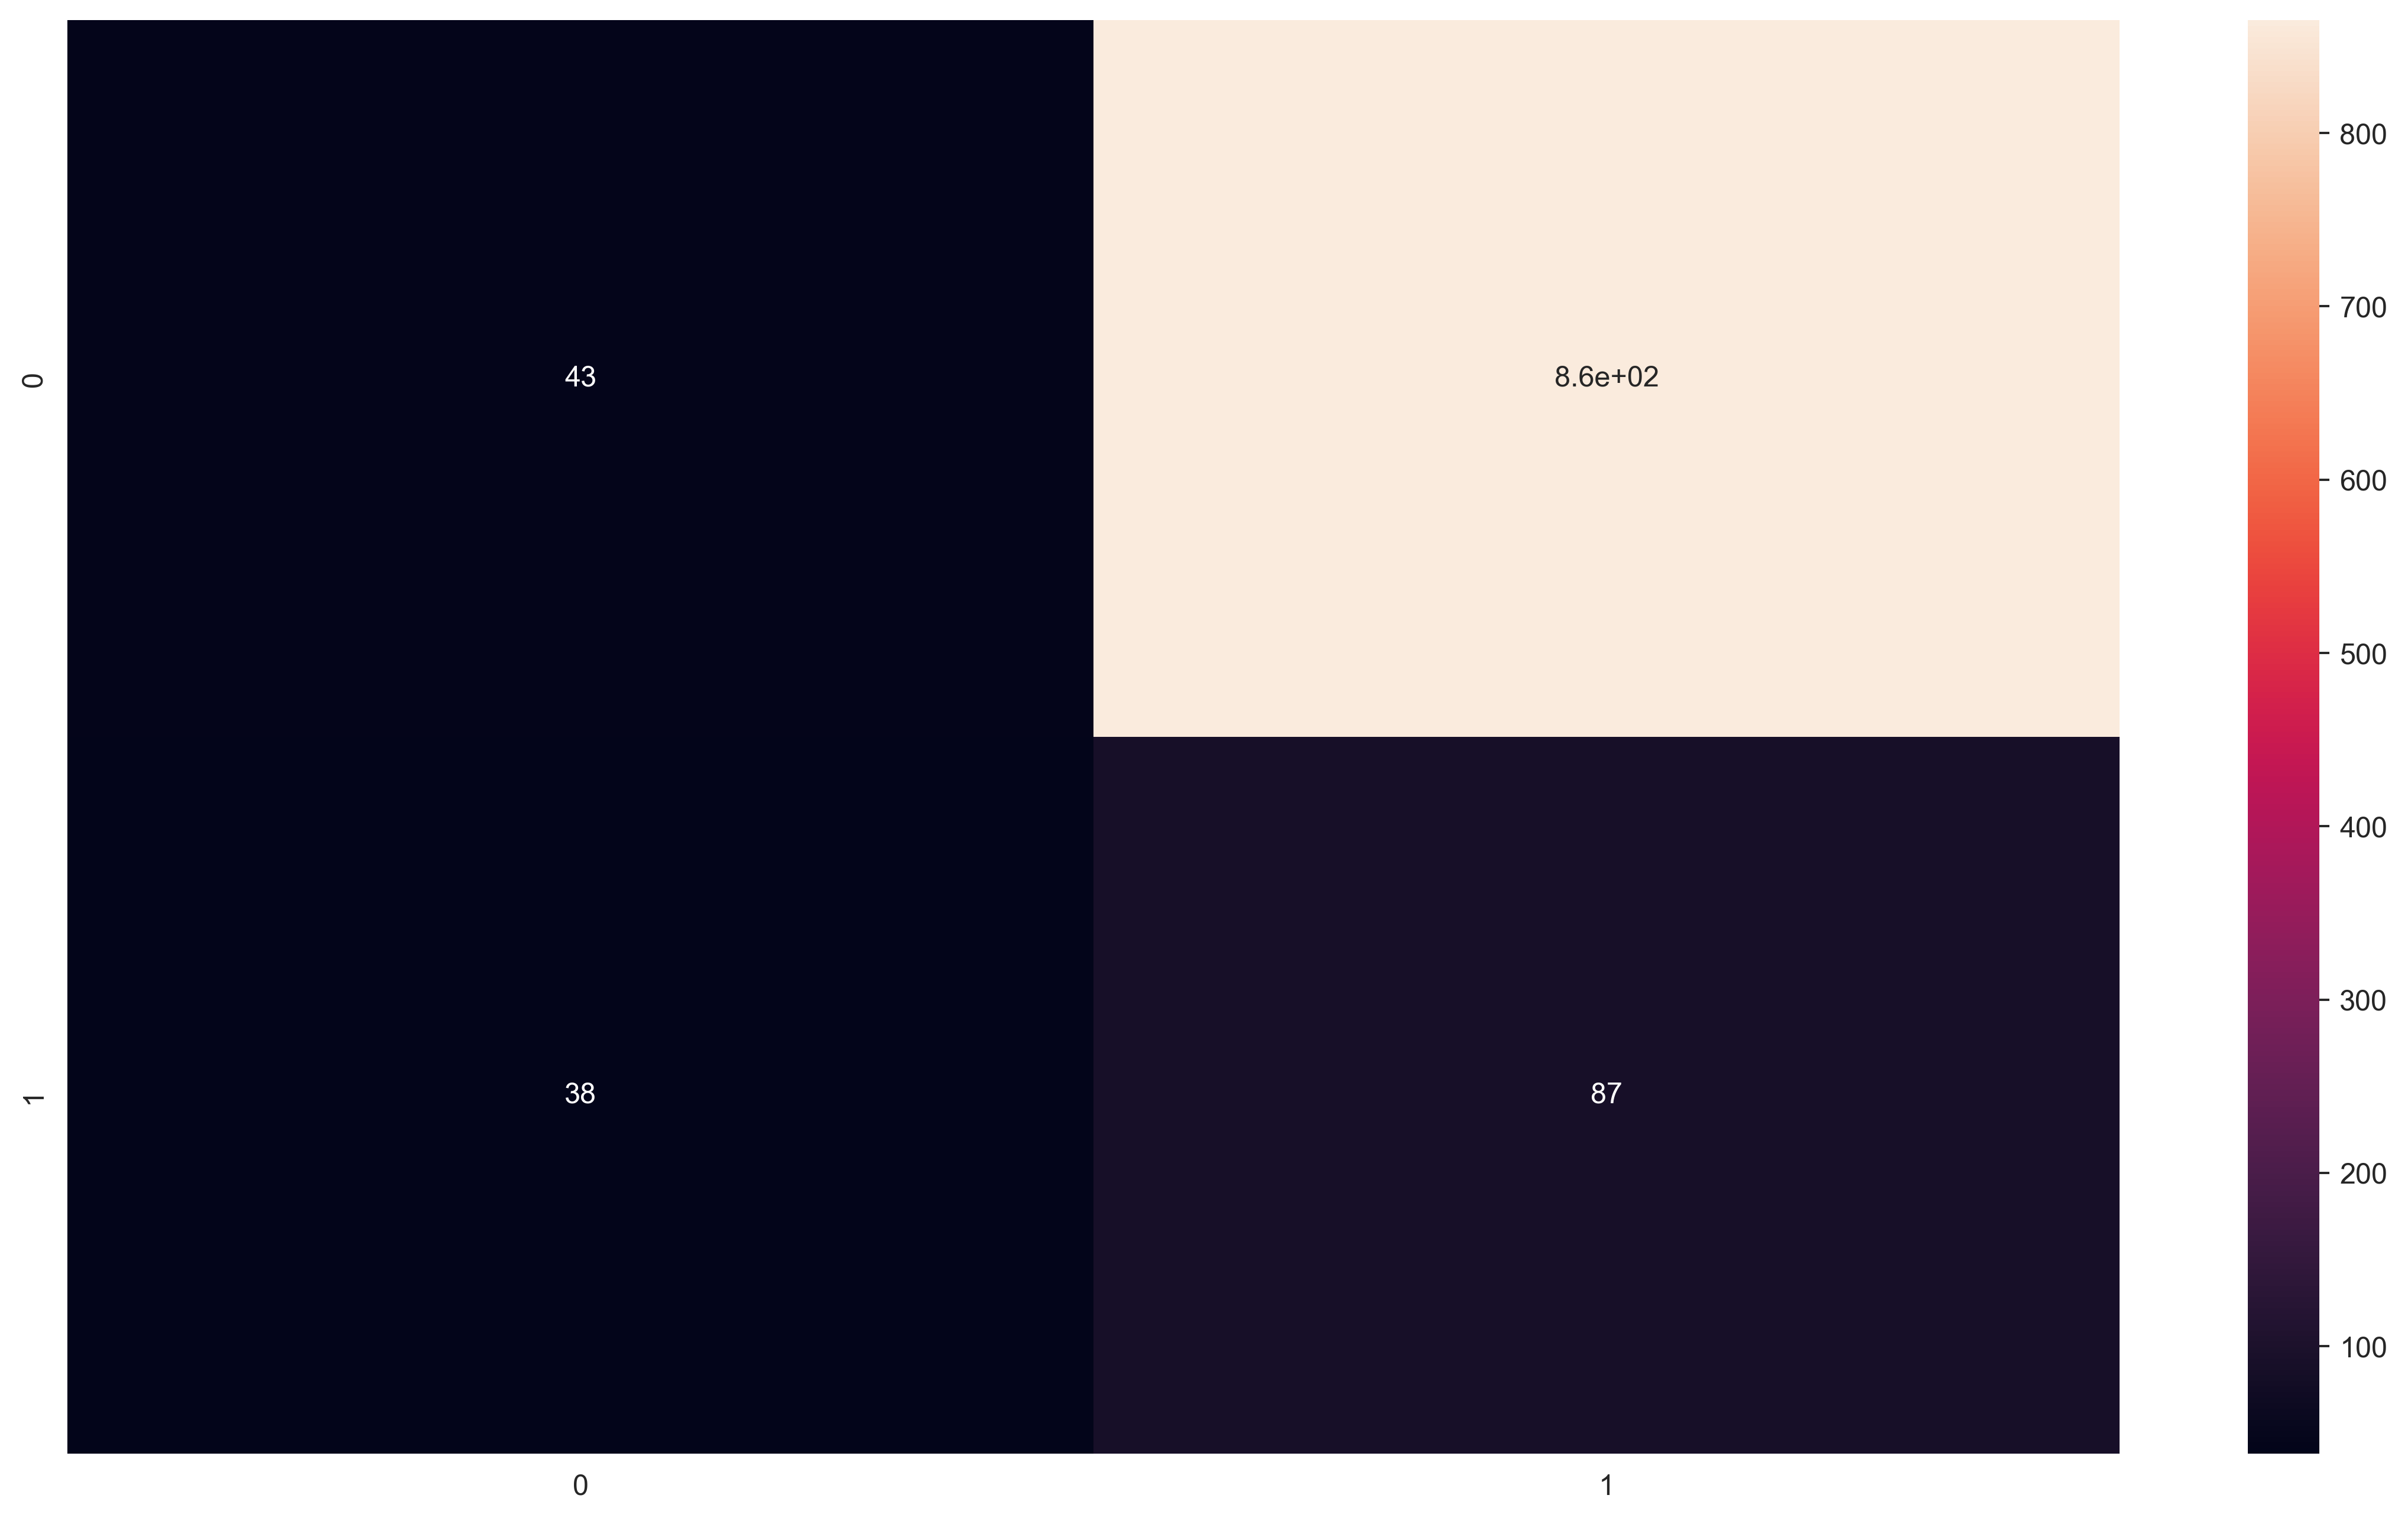

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluating  DOL Model :-
Model Accuracy   :  0.13
Model precision  :  0.11
Model recall     :  0.86
Model f1_score   :  0.19
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.62      0.03      0.06       908
           1       0.11      0.86      0.19       125

    accuracy                           0.13      1033
   macro avg       0.37      0.44      0.13      1033
weighted avg       0.56      0.13      0.08      1033
 

Printing Confusion Matrix :
[[ 30 878]
 [ 18 107]]


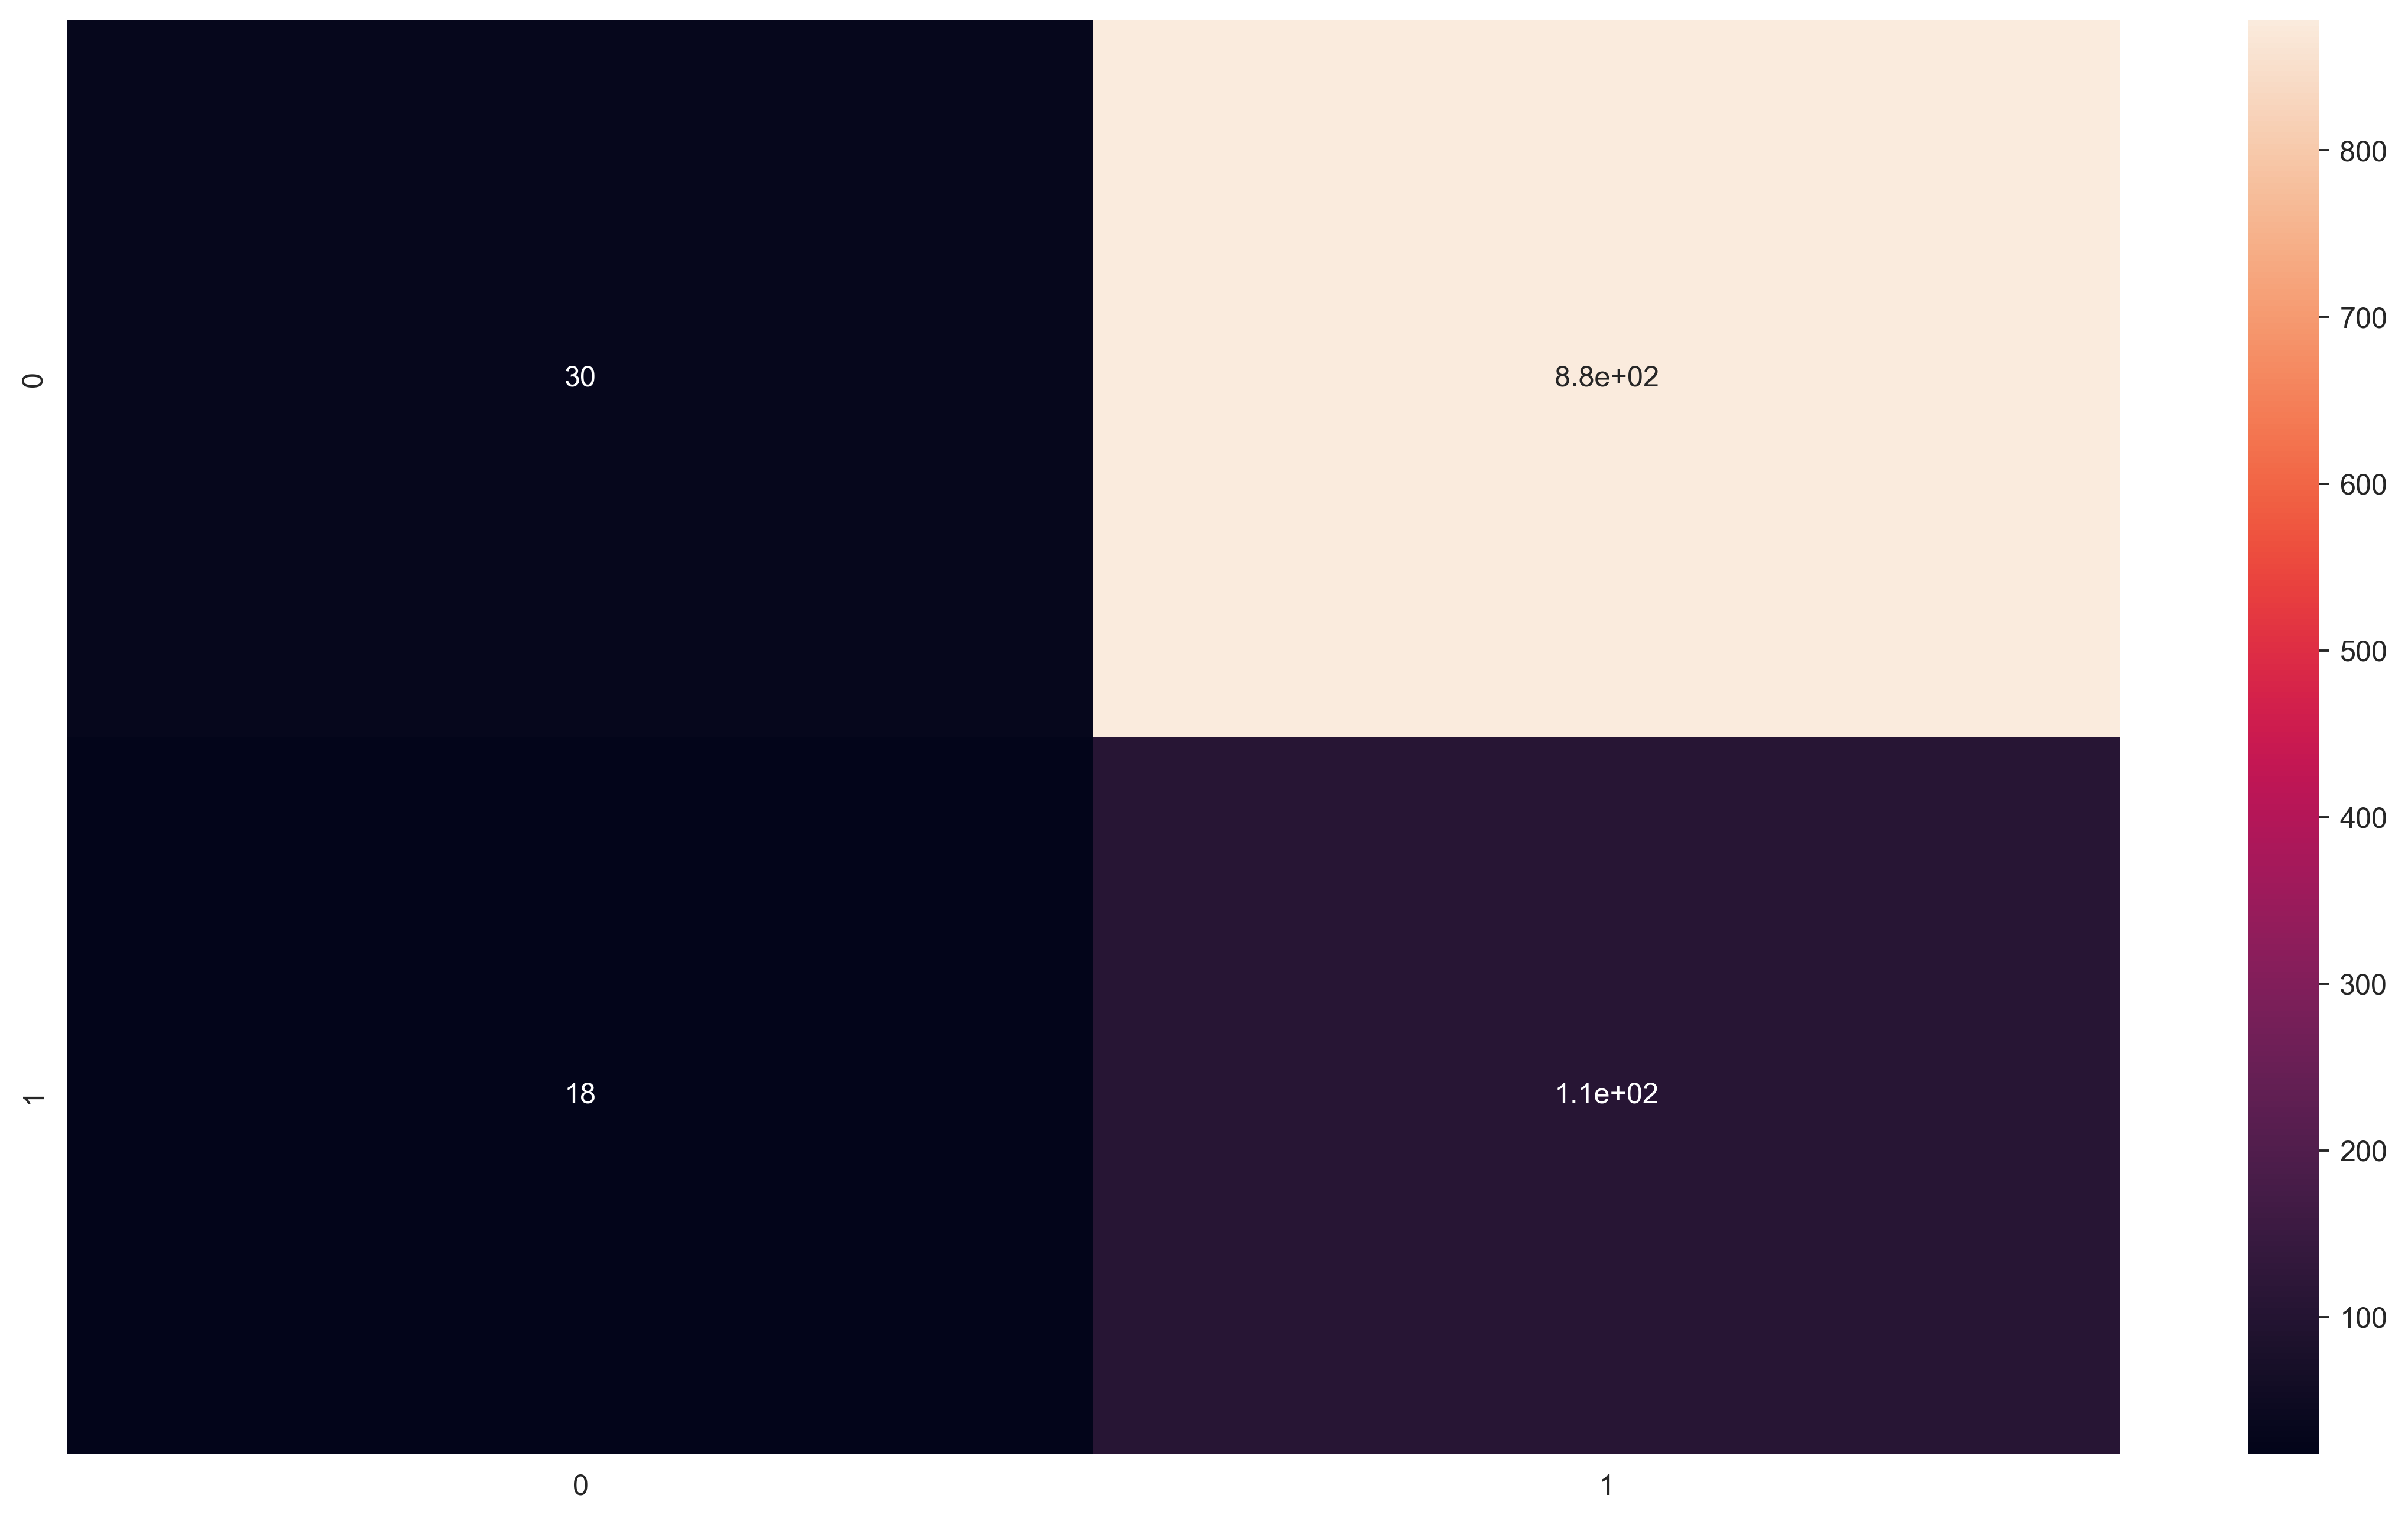

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Evaluating  ES & DOL Model :-
Model Accuracy   :  0.87
Model precision  :  0.0
Model recall     :  0.0
Model f1_score   :  0.0
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       908
           1       0.00      0.00      0.00       125

    accuracy                           0.87      1033
   macro avg       0.44      0.49      0.47      1033
weighted avg       0.77      0.87      0.82      1033
 

Printing Confusion Matrix :
[[898  10]
 [125   0]]


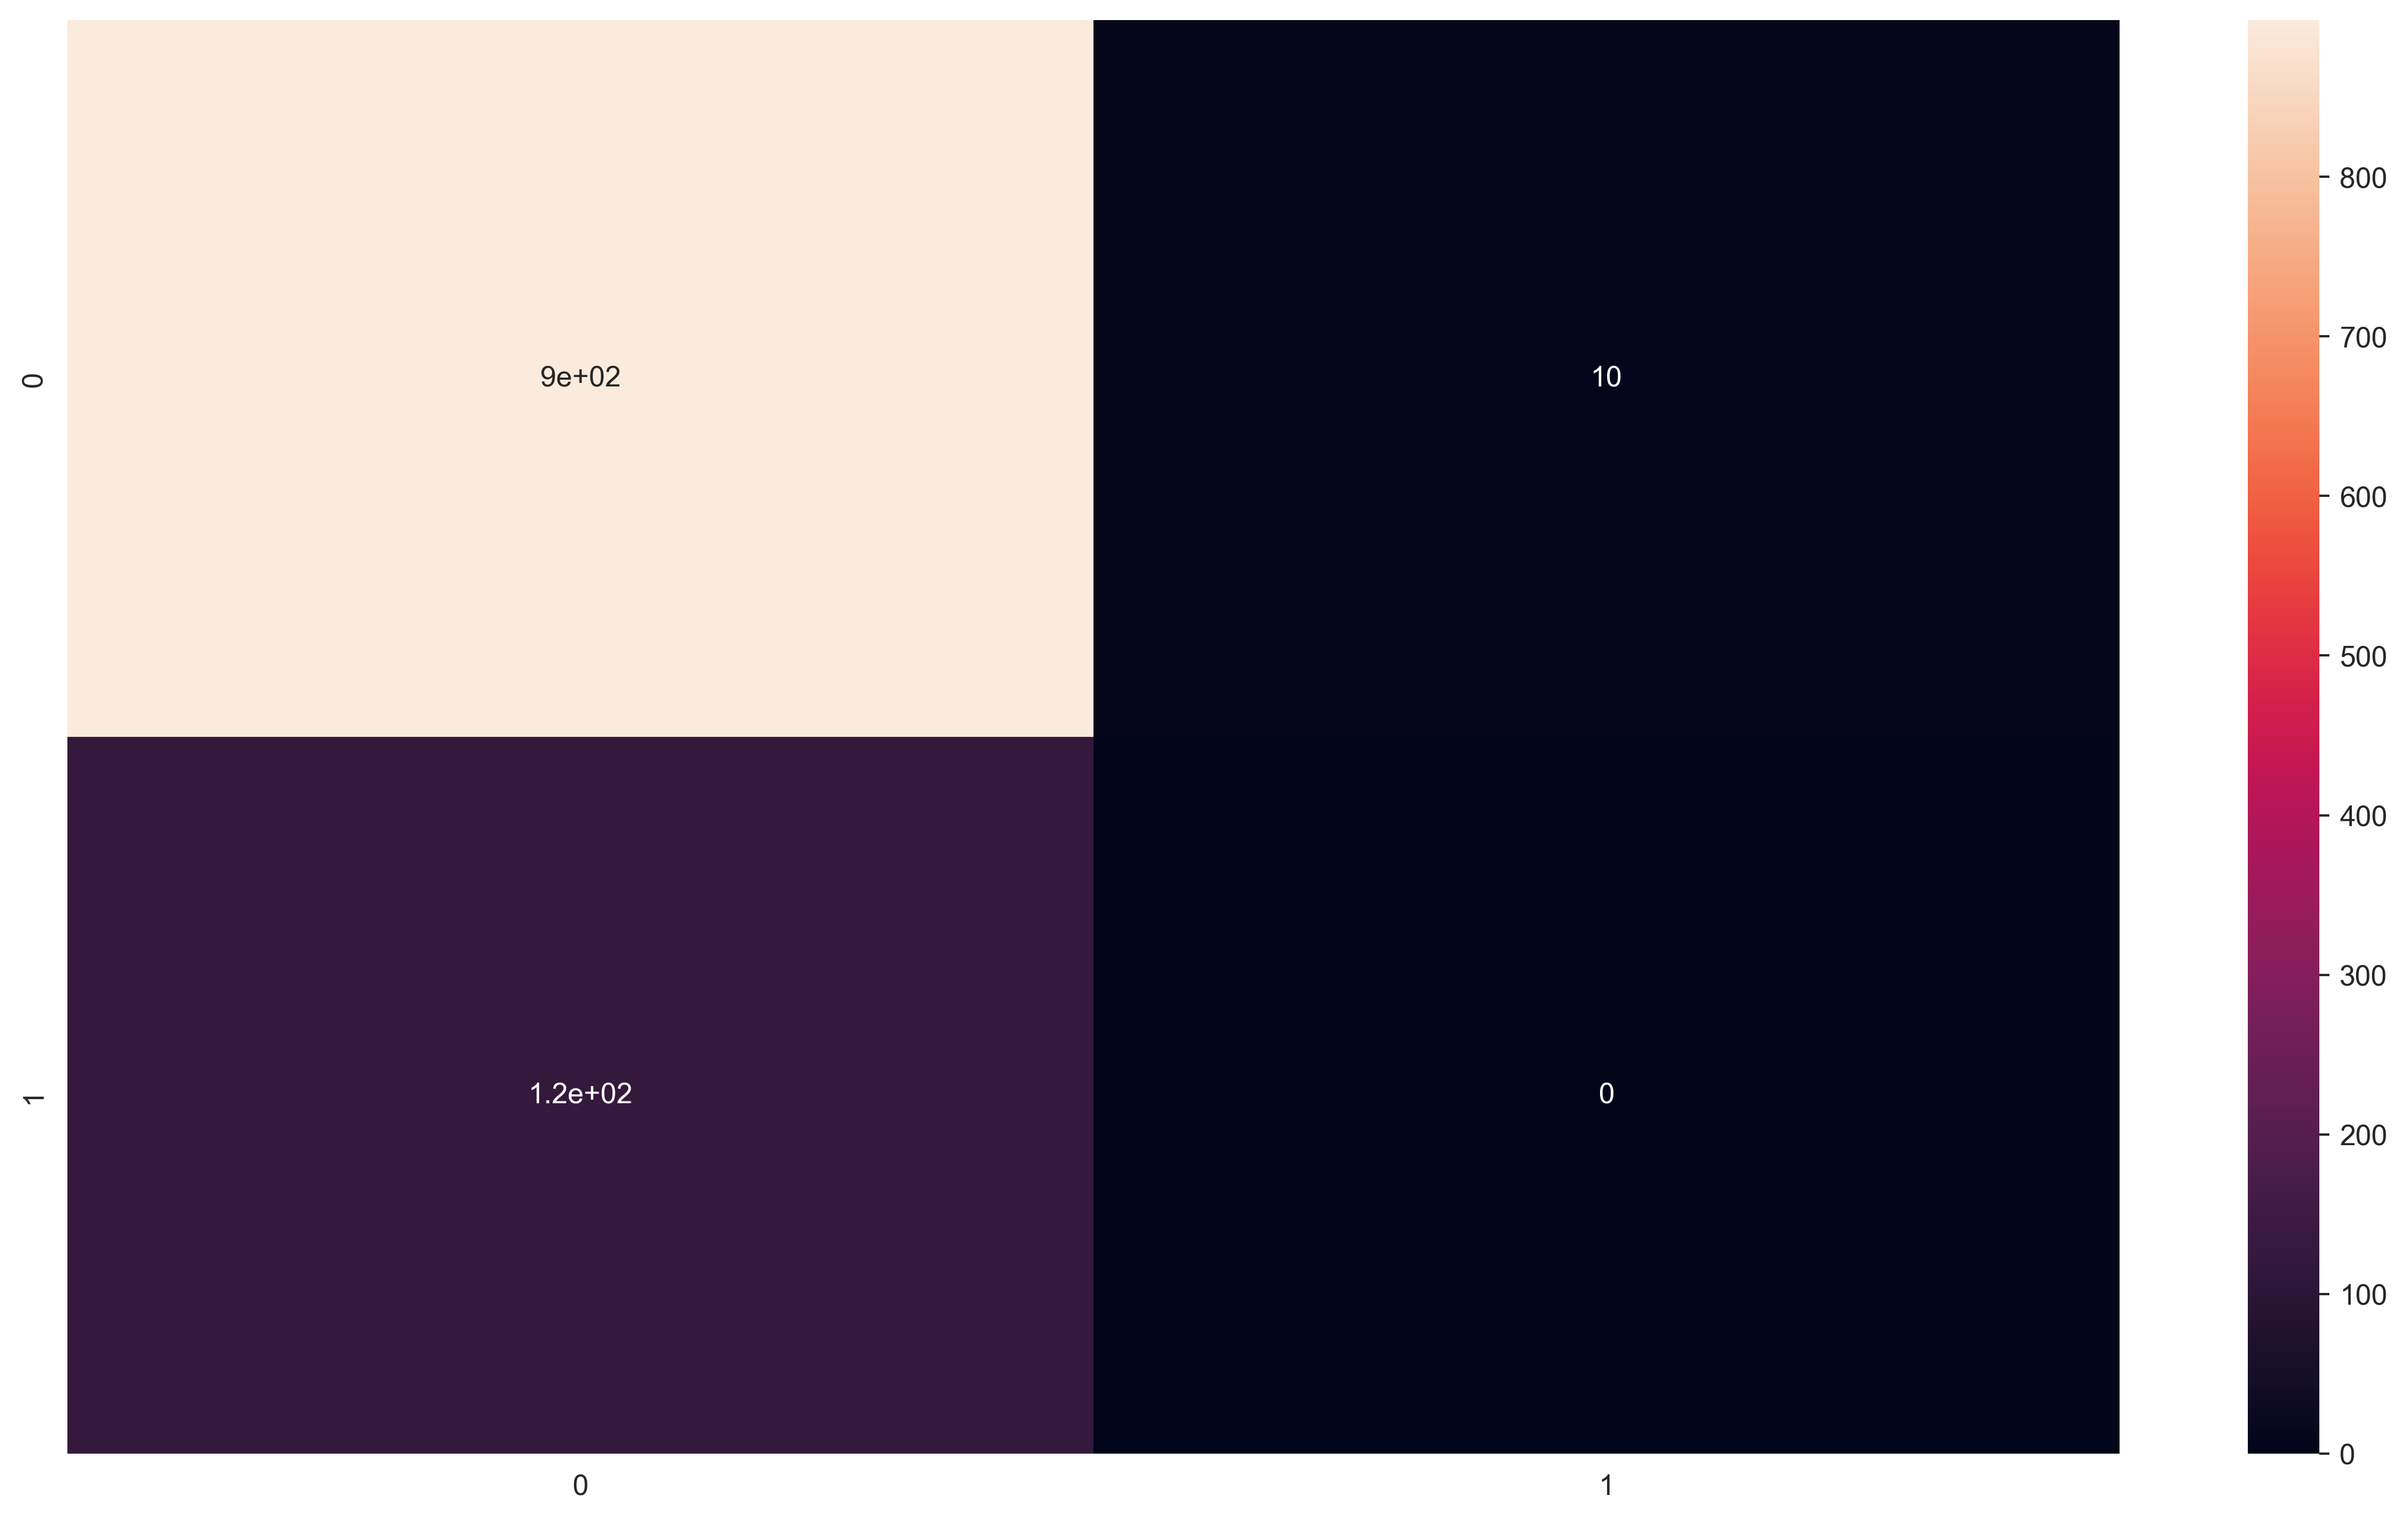

In [47]:
model = [def_model, es_model, dol_model, es_dol_model]
model_name = ['Default Model', 'ES Model', 'DOL Model', 'ES & DOL Model']

for i in range(len(model)):

    yp = model[i].predict(xtest)
    ypred = []

    for j in yp:
        if j > 0.5:
            ypred.append(1)
        else:
            ypred.append(0)

    print("Evaluating ", model_name[i], ":-")
    print("Model Accuracy   : ", round(accuracy_score(ytest, ypred), 2))
    print("Model precision  : ", round(precision_score(ytest, ypred), 2))
    print("Model recall     : ", round(recall_score(ytest, ypred), 2))
    print("Model f1_score   : ", round(f1_score(ytest, ypred), 2))
    print('Printing Confusion Matrix :')
    print(classification_report(ytest, ypred), '\n')
    print('Printing Confusion Matrix :')
    print(confusion_matrix(ytest, ypred))
    sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
    plt.show()

### Ploting Loss VS Val-Loss For All Model

In [ ]:
fig, ax = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        sns.lineplot(es_history.history['loss'][j*50:(j+1)*50], label='Train', ax=ax[i][j])
        sns.lineplot(es_history.history['val_loss'][j*50:(j+1)*50], label='Test', ax=ax[i][j])
        ax[i][j].set_title(model_name[1]+' - Epoch '+str(j*50+1)+'-'+str((j+1)*50))
        ax[i][j].set_xlabel('No Of Epochs')
        ax[i][j].set_ylabel('Error')

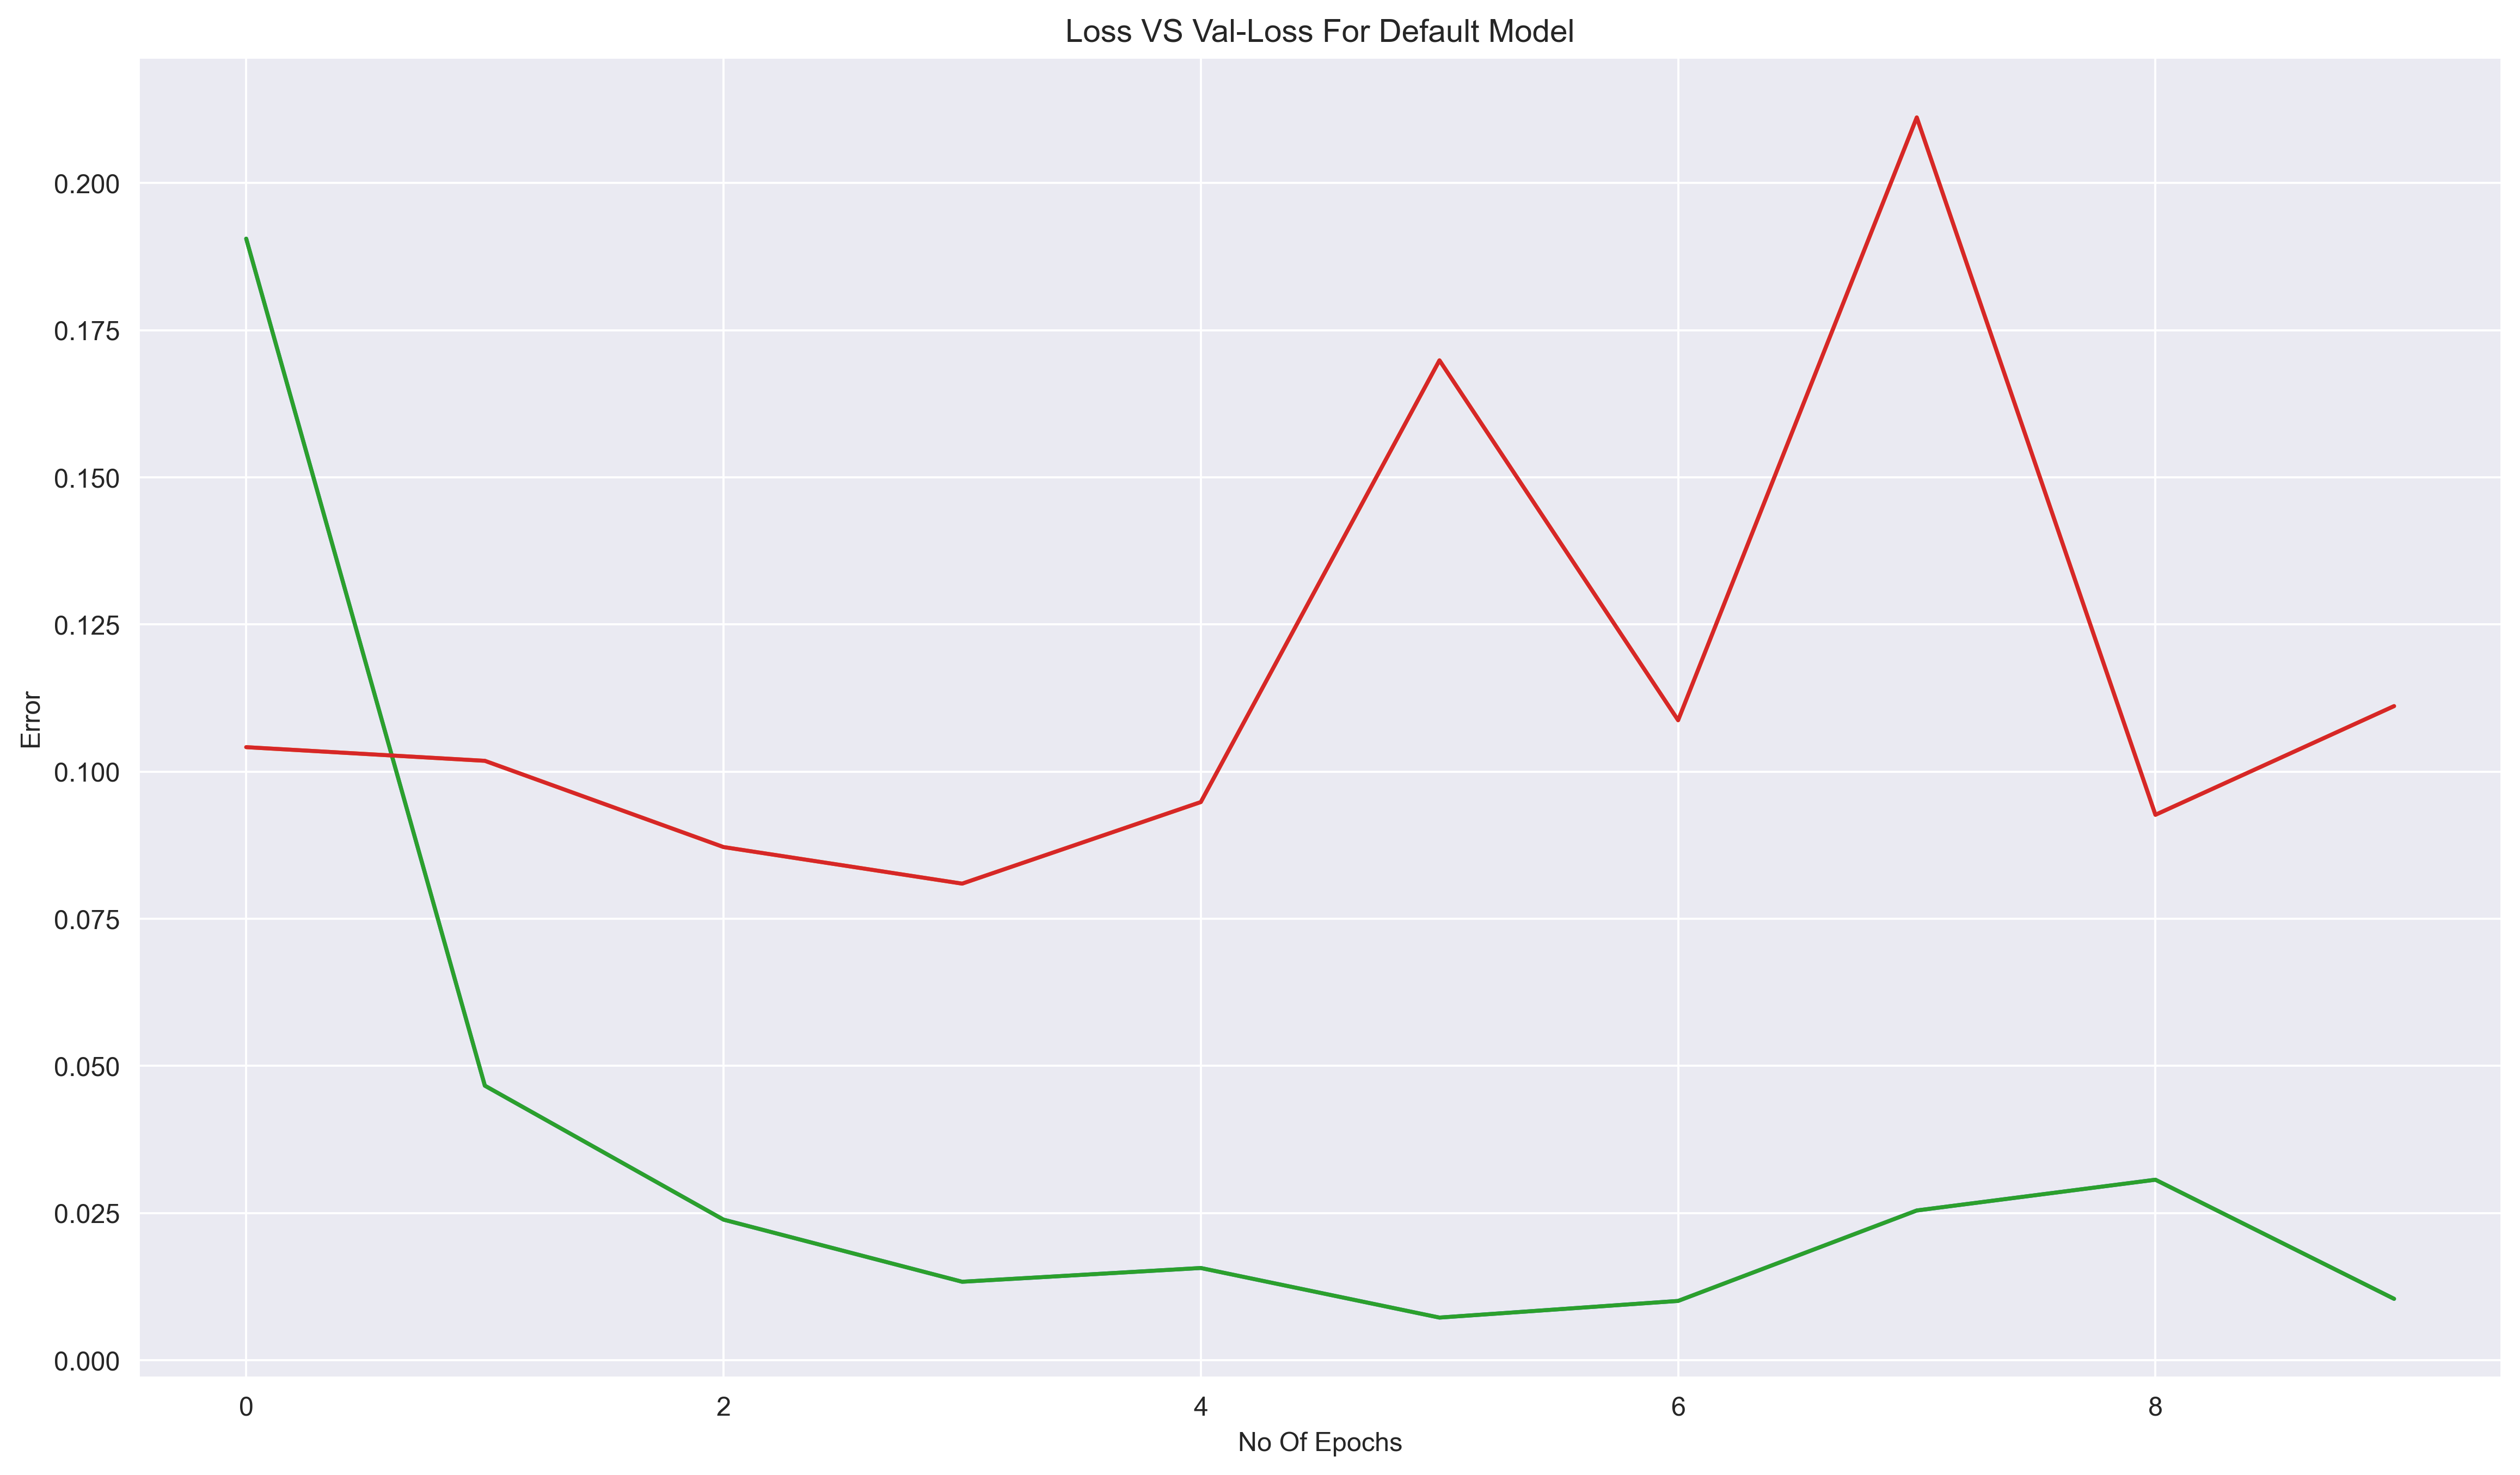

In [62]:
sns.lineplot(def_history.history['loss'])
sns.lineplot(def_history.history['val_loss'])
plt.title('Loss VS Val-Loss For '+ model_name[0])
plt.ylabel('Error')
plt.xlabel('No Of Epochs')
plt.show()